# EDA

In [235]:
# import libraries
import pandas as pd
import numpy as np

In [236]:
# load data
lobster_land = pd.read_csv('/content/drive/MyDrive/TB_classification_project/1632604477203_lobsterland_2021.csv')
# preview the first few rows
lobster_land.head()

,Date,Day.of.Week,Max,Average,Min,Precip,DayPass,UniqueVisitor,AvgDuration,ParkingRev,SnackShackRev,LobsteramaRev,GoldZoneRev,MerchRev,StaffHours,Sign_Ups2022,Fireworks,Spec_Event,DailyGrossRev,day_type
0,2021/5/31,Monday,59,53.5,47,0.90,3261,4024,328,15212.86,18532.06,29971.82,26283.73,34775.54,922.846054,32,1,1,138250.61,Partly Sunny
1,2021/6/1,Tuesday,77,63.2,47,0.02,2263,2646,376,9323.06,11359.90,18367.60,16113.23,21315.35,565.828102,19,0,1,103408.71,Very Sunny
2,2021/6/2,Wednesday,77,64.7,49,0.00,2731,2936,318,11252.19,13711.52,22178.14,19444.90,25726.56,682.831533,22,0,4,102285.09,Very Rainy
3,2021/6/3,Thursday,68,62.7,58,NaN,2879,3196,485,11861.30,14452.55,23377.00,20499.36,27120.90,719.770323,25,0,4,107836.25,Partly Cloudy
4,2021/6/4,Monday,93,80.5,64,0.00,2118,2334,240,8727.01,10630.80,17194.67,15080.27,19952.06,529.510078,18,0,3,79321.23,Very Sunny


In [237]:
lobster_land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           99 non-null     object 
 1   Day.of.Week    99 non-null     object 
 2   Max            99 non-null     int64  
 3   Average        99 non-null     float64
 4   Min            99 non-null     int64  
 5   Precip         93 non-null     float64
 6   DayPass        99 non-null     int64  
 7   UniqueVisitor  99 non-null     int64  
 8   AvgDuration    99 non-null     int64  
 9   ParkingRev     99 non-null     float64
 10  SnackShackRev  99 non-null     float64
 11  LobsteramaRev  99 non-null     float64
 12  GoldZoneRev    99 non-null     float64
 13  MerchRev       99 non-null     float64
 14  StaffHours     99 non-null     float64
 15  Sign_Ups2022   99 non-null     int64  
 16  Fireworks      99 non-null     int64  
 17  Spec_Event     99 non-null     int64  
 18  DailyGrossRe

The head() function displays 5 rows by default.

In [238]:
# get the shape of the dataset
lobster_land.shape

(99, 20)

The dataset has 99 rows and 20 columns

The Spec_Event variable contains numerical values. This could be a categorical or numerical type.

In [239]:
# get a description of the Spec_Event variable
lobster_land.Spec_Event.describe()

count    99.000000
mean      3.575758
std       1.761788
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max       6.000000
Name: Spec_Event, dtype: float64

The variable, Spec_Event has 99 rows (values) stored in it. Of this, there are only 6 unique values which could mean the data is categorical. The value 5, has the highest frequency at 29.

In [240]:
# converting the special events variable from a numerical to categorical type
lobster_land["Spec_Event"] = lobster_land["Spec_Event"].astype('category')
lobster_land.Spec_Event.value_counts() 

5    29
1    18
3    15
2    15
6    14
4     8
Name: Spec_Event, dtype: int64

The function value_counts() gives us the summary of the frequency of occurrence of each of the categories while describe() just tells us the value with the highest frequency. The valu_counts() methods is better for the getting the frequency distribution across all the categories and the order from the highest to lowest value.

In [241]:
# check for null values in the dataset
lobster_land.isnull().sum()

Date             0
Day.of.Week      0
Max              0
Average          0
Min              0
Precip           6
DayPass          0
UniqueVisitor    0
AvgDuration      0
ParkingRev       0
SnackShackRev    0
LobsteramaRev    0
GoldZoneRev      0
MerchRev         0
StaffHours       0
Sign_Ups2022     0
Fireworks        0
Spec_Event       0
DailyGrossRev    0
day_type         0
dtype: int64

The values indicate the number of null values present in each of the columns. Only, the precipitation variable has null values. It has six of them.

In [242]:
# replace missing values
lobster_land['Precip'].fillna(value = 0.00,inplace = True)
# confirm the missing values have been replaced
lobster_land['Precip'].isnull().any()

False

there are many possible approaches to take when we have missing data in our dataset. These include removing all rows with missing values, replacing rows
with missing values in a particular column, or replacing missing values with a central value like a column mean or median. Replacing with ‘0’ sometimes makes sense like in our case. The column 'Precip'is the only column with missing values and only 6 of them. This would not have a severe impact on any of the central tendencies of the data.

In [243]:
# Check for values of temeperature below 51
lobster_land[['Max', 'Average', 'Min']][lobster_land[['Max', 'Average', 'Min']] <51].head()


,Max,Average,Min
0,NaN,NaN,47.0
1,NaN,NaN,47.0
2,NaN,NaN,49.0
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [244]:
# get a list of all the values for the 3 columns
x_min = lobster_land[ 'Min'][lobster_land['Min'] <51].values.tolist()
x_max = lobster_land[ 'Max'][lobster_land['Max'] <51].values.tolist()
x_avg = lobster_land[ 'Average'][lobster_land['Average'] <51].values.tolist()

In [245]:
# replace the values with 51
lobster_land['Min'] =lobster_land['Min'].replace(x_min, 51)
lobster_land['Max'] =lobster_land['Max'].replace(x_max, 51)
lobster_land['Average'] =lobster_land['Average'].replace(x_avg, 51)
lobster_land[['Max', 'Average', 'Min']][lobster_land[['Max', 'Average', 'Min']] <51].head()

,Max,Average,Min
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [246]:
# The Labor Day Effect
print (lobster_land.mean())
lobster_land[-4:].head()

Max                  76.797980
Average              68.191717
Min                  60.515152
Precip                0.156465
DayPass            3241.111111
UniqueVisitor      3757.696970
AvgDuration         337.141414
ParkingRev        13344.433939
SnackShackRev     16233.011010
LobsteramaRev     28292.904646
GoldZoneRev       26749.907273
MerchRev          32051.397475
StaffHours          808.894626
Sign_Ups2022         44.636364
Fireworks             0.252525
DailyGrossRev    120135.184444
dtype: float64


,Date,Day.of.Week,Max,Average,Min,Precip,DayPass,UniqueVisitor,AvgDuration,ParkingRev,SnackShackRev,LobsteramaRev,GoldZoneRev,MerchRev,StaffHours,Sign_Ups2022,Fireworks,Spec_Event,DailyGrossRev,day_type
95,2021/9/3,Friday,72,63.40,54,0.00,4494,5108,289,18514.43,22563.10,40984.81,40982.92,51518.10,1123.555994,93,0,1,165643.57,Overcast
96,2021/9/4,Saturday,75,64.50,55,0.00,4200,5066,375,17304.08,21087.59,38308.28,38304.65,48504.75,1050.101320,77,1,2,154805.40,Partly Sunny
97,2021/9/5,Sunday,68,60.70,51,0.00,4424,5482,412,18226.30,22211.07,40346.49,40348.37,52718.03,1106.061363,83,0,5,163065.68,Cloudy
98,2021/9/6,Monday,76,66.58,60,0.19,5112,5570,471,18407.56,19829.31,55447.87,40739.78,49912.88,1033.587580,129,1,1,138250.61,Very Sunny


In [247]:
# get the percentage changes in the numerical variables
labour_day_stats = ((lobster_land[-4:].select_dtypes(np.number) - lobster_land.mean())/ lobster_land[-4:]) * 100
labour_day_stats.dropna(axis=1)

,Average,AvgDuration,DailyGrossRev,DayPass,Fireworks,GoldZoneRev,LobsteramaRev,Max,MerchRev,Min,ParkingRev,Precip,Sign_Ups2022,SnackShackRev,StaffHours,UniqueVisitor
95,-7.557914,-16.657929,27.473681,27.879148,-inf,34.729133,30.967340,-6.663861,37.786142,-12.065095,27.924144,-inf,52.003910,28.055050,28.005847,26.435063
96,-5.723593,10.095623,22.395999,22.830688,74.747475,30.165379,26.144153,-2.397306,33.921116,-10.027548,22.882731,-inf,42.030697,23.021023,22.969850,25.825168
97,-12.342203,18.169560,26.327119,26.737995,-inf,33.702632,29.875177,-12.938206,39.202209,-18.657160,26.784734,-inf,46.221249,26.914773,26.867111,31.453904
98,-2.420723,28.420082,13.103324,36.597983,74.747475,34.339588,48.973866,-1.049973,35.785317,-0.858586,27.505688,17.650186,65.398168,18.136279,21.739131,32.536859


Take a subset of the Labor Day long weekend (the last four days of the
dataset), and analyze the variables to see which values significantly
departed from the overall dataset averages.
b. Among the variables in this subset, which ones seem to stand out the
most? Why do you think this is the case?
The number of unique visitors and new sign ups, revenues and staff hours significantly went up as shown by the percentages above. Negative values show a decrease. Labour day being a national holiday, a lot of celebration happen around this time and people often flock entartainment venues. This causes a rise in revenues, sign ups, uniques visitors and inherently the staff have to work for more hours.

In [248]:
lobster_land[-4:].head()

,Date,Day.of.Week,Max,Average,Min,Precip,DayPass,UniqueVisitor,AvgDuration,ParkingRev,SnackShackRev,LobsteramaRev,GoldZoneRev,MerchRev,StaffHours,Sign_Ups2022,Fireworks,Spec_Event,DailyGrossRev,day_type
95,2021/9/3,Friday,72,63.40,54,0.00,4494,5108,289,18514.43,22563.10,40984.81,40982.92,51518.10,1123.555994,93,0,1,165643.57,Overcast
96,2021/9/4,Saturday,75,64.50,55,0.00,4200,5066,375,17304.08,21087.59,38308.28,38304.65,48504.75,1050.101320,77,1,2,154805.40,Partly Sunny
97,2021/9/5,Sunday,68,60.70,51,0.00,4424,5482,412,18226.30,22211.07,40346.49,40348.37,52718.03,1106.061363,83,0,5,163065.68,Cloudy
98,2021/9/6,Monday,76,66.58,60,0.19,5112,5570,471,18407.56,19829.31,55447.87,40739.78,49912.88,1033.587580,129,1,1,138250.61,Very Sunny


** Collapsing factor**

1. Lobster Land management saw the day_type variable, and they think that
the 8 separate levels for this factor are not needed. Using any method,
collapse the levels of this factor from 8 to just 3.
2. Why can it be helpful/useful to collapse the levels of a factor variable? 

In a couple of sentences, explain and give an example.

In [249]:
#  Remove the variable ‘Max’ from the dataframe
lobster_land.drop('Max', inplace=True, axis=1)
lobster_land.head()

,Date,Day.of.Week,Average,Min,Precip,DayPass,UniqueVisitor,AvgDuration,ParkingRev,SnackShackRev,LobsteramaRev,GoldZoneRev,MerchRev,StaffHours,Sign_Ups2022,Fireworks,Spec_Event,DailyGrossRev,day_type
0,2021/5/31,Monday,53.5,51,0.90,3261,4024,328,15212.86,18532.06,29971.82,26283.73,34775.54,922.846054,32,1,1,138250.61,Partly Sunny
1,2021/6/1,Tuesday,63.2,51,0.02,2263,2646,376,9323.06,11359.90,18367.60,16113.23,21315.35,565.828102,19,0,1,103408.71,Very Sunny
2,2021/6/2,Wednesday,64.7,51,0.00,2731,2936,318,11252.19,13711.52,22178.14,19444.90,25726.56,682.831533,22,0,4,102285.09,Very Rainy
3,2021/6/3,Thursday,62.7,58,0.00,2879,3196,485,11861.30,14452.55,23377.00,20499.36,27120.90,719.770323,25,0,4,107836.25,Partly Cloudy
4,2021/6/4,Monday,80.5,64,0.00,2118,2334,240,8727.01,10630.80,17194.67,15080.27,19952.06,529.510078,18,0,3,79321.23,Very Sunny


In [250]:
# Renaming a variable
lobster_land.rename(columns={'Day.of.Week': 'Day_of_week'}, inplace=True)
lobster_land.columns

Index(['Date', 'Day_of_week', 'Average', 'Min', 'Precip', 'DayPass',
       'UniqueVisitor', 'AvgDuration', 'ParkingRev', 'SnackShackRev',
       'LobsteramaRev', 'GoldZoneRev', 'MerchRev', 'StaffHours',
       'Sign_Ups2022', 'Fireworks', 'Spec_Event', 'DailyGrossRev', 'day_type'],
      dtype='object')

In [251]:
# collapsing factor
levels_8 =lobster_land.day_type.unique().tolist()
levels_8


['Partly Sunny',
 'Very Sunny',
 'Very Rainy',
 'Partly Cloudy',
 'Cloudy',
 'Sunny',
 'Overcast',
 'Rainy']

In [252]:
lobster_land["day_type"] = lobster_land["day_type"].replace(['Very Sunny','Sunny', 'Partly Sunny' ], 'Sunny')
lobster_land["day_type"] = lobster_land["day_type"].replace(['Overcast','Partly Cloudy', 'Cloudy' ], 'Cloudy')
lobster_land["day_type"] = lobster_land["day_type"].replace(['Rainy','Very Rainy' ], 'Rainy')

levels_3 =lobster_land.day_type.unique().tolist()
levels_3

['Sunny', 'Rainy', 'Cloudy']

Collapsing the factors of a level variable directly affects the scale of information across all data generating models. This is important when fitting data to a model. with categorical data, it reduces the number of decisions the model makes when fitting the model with data. For example, if we were using this data to train a model to predict the amount or revenue generated per day, depending on all of the other variables provided, it would probably have higher performance if it only had to make decisons between 3 categories for day_type (e.g. rainy, cloudy, sunny) unlike if it had to decide between all the following categories: 'Partly Sunny',
 'Very Sunny',
 'Very Rainy',
 'Partly Cloudy',
 'Cloudy',
 'Sunny',
 'Overcast',
 'Rainy'

# Data Visualization

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns  

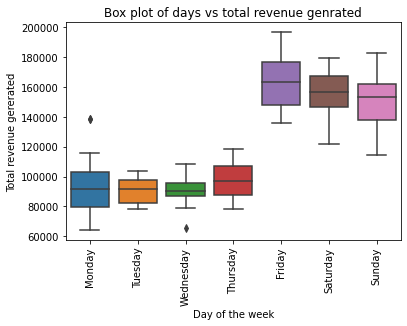

In [254]:
sns.boxplot(x="Day_of_week", y="DailyGrossRev", data=lobster_land)
plt. xticks(rotation=90)
plt.title("Box plot of days vs total revenue genrated")
plt.ylabel("Total revenue gererated")
plt.xlabel("Day of the week")

plt.show()

As expected, the revenue goes up during weekends, since a lot of people get time to visit entertainment areas.

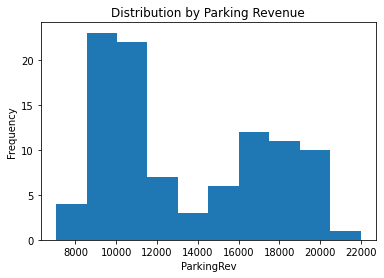

In [255]:
plt.hist(lobster_land['ParkingRev'])
plt.title('Distribution by Parking Revenue')
plt.xlabel('ParkingRev')
plt.ylabel("Frequency")
plt.show()

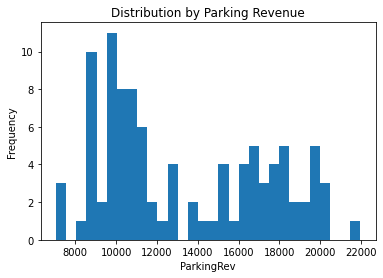

In [256]:
plt.hist(lobster_land['ParkingRev'], bins=30)
plt.title('Distribution by Parking Revenue')
plt.xlabel('ParkingRev')
plt.ylabel("Frequency")
plt.show()

The histogram with more bins has more bars for the same range of data, gives a more detailed description of our data, by showing the frequency distribution for smaller ranges of the parking revenue values.

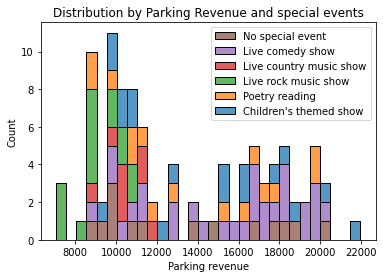

In [257]:
sns.histplot(data=lobster_land, x="ParkingRev", hue='Spec_Event', bins=30, multiple="stack" )
plt.title('Distribution by Parking Revenue and special events')
plt.xlabel("Parking revenue")
plt.legend(labels=["No special event","Live comedy show","Live country music show", "Live rock music show", "Poetry reading", "Children's themed show"])

Adding the special events variable as the hue to the histogram allows us to tell how the different categories in the variable affected the parking revenue collected. Children-themed and live comedy shows dominate the section to the right with higher parking revenue values. Hence, we can conclude that these particular shows generate the most revenue.

([<matplotlib.axis.XTick at 0x7f2cad66cc10>,
 [Text(0, 0, 'No fireworks'), Text(0, 0, 'Fireworks')])

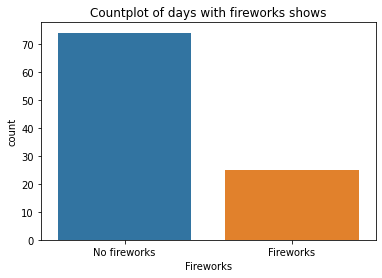

In [258]:
sns.countplot(x="Fireworks", data=lobster_land)
plt.title('Countplot of days with fireworks shows')
plt.xticks(np.arange(2), ('No fireworks', 'Fireworks'))

The count for dates without nighttime fireworks shows is longer than dates with fireworks shows. This means, fireworks shows don't happen as frequently.

([<matplotlib.axis.XTick at 0x7f2cadcabc50>,
 [Text(0, 0, 'No fireworks'), Text(0, 0, 'Fireworks')])

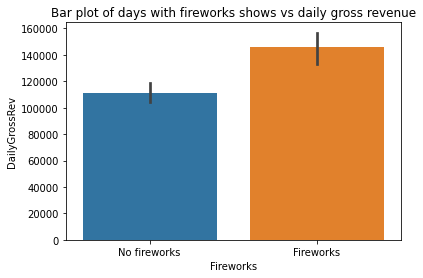

In [259]:
sns.barplot(x="Fireworks", y="DailyGrossRev", data=lobster_land)
plt.title('Bar plot of days with fireworks shows vs daily gross revenue')
plt.xticks(np.arange(2), ('No fireworks', 'Fireworks'))

The bar representing the daily gross revenue for days with fireworks shows is longer than that for days without. This shows that days with fireworks shows generate a lot more revenue compared to days without, regardless of the fact that days without fireworks are significantly more than those with fireworks shows.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

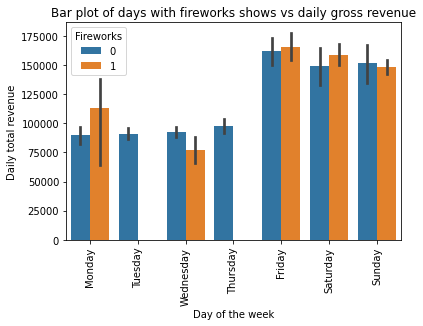

In [260]:
sns.barplot(x="Day_of_week", y="DailyGrossRev", data=lobster_land, hue="Fireworks")
plt.xlabel("Day of the week")
plt.ylabel("Daily total revenue")
plt.title('Bar plot of days with fireworks shows vs daily gross revenue')
plt. xticks(rotation=90)
#plt.legend(labels=["Fireworks", "No fireworks"])

The bars are longer during the weekend period. Also, the bars are longer for days with fireworks shows during this period. The daily gross revenue is way higher during weekends during which most of the firewroks shows happen. The value is at it's highest on friday followed by Saturday, Sunday then Monday. To confirm our previous conclusion days with fireworks generate more revenue. 